In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/Colab_Notebooks/AdvancedDeepLearningCourse/Session01/MLP Mnist functional')

In [4]:
!ls

mlp_mnist_funtional.ipynb  mlp-mnist.png


In [5]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Model
from keras.datasets import mnist
from keras.utils import to_categorical, plot_model
from keras.layers import Input, Dense, Activation, Dropout

Using TensorFlow backend.


In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
n_labels = len(np.unique(y_train))
print(n_labels)
print(x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
10
(60000, 28, 28)


In [7]:
print(y_test.shape)

(10000,)


5


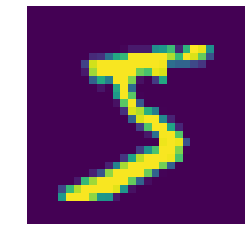

In [8]:
plt.figure()
plt.imshow(x_train[0])
plt.axis('off');
print(y_train[0])

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [10]:
x_train = x_train.astype('float32').reshape((-1, 784)) / 255
x_test = x_test.astype('float32').reshape((-1, 784)) / 255
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [0]:
n_hiddens = [256, 256]
dropout= 0.5

In [12]:
inputs = Input(shape=(784,) , name='inputs')
x = inputs
x = Dense(units=n_hiddens[0], name='dense_1')(x)
x = Activation('relu',name='relu_1')(x)
x = Dropout(dropout)(x)

x = Dense(units=n_hiddens[1], name='dense_2')(x)
x = Activation('relu',name='relu_2')(x)
x = Dropout(dropout)(x)

x = Dense(units=n_labels, name='output_layer')(x)
outputs = Activation('softmax',name='softmax')(x)


model = Model(inputs= inputs, outputs=outputs, name='mlp-mnist')
model.summary()
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

W0817 13:41:19.676635 140300675008384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0817 13:41:19.721418 140300675008384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0817 13:41:19.737858 140300675008384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0817 13:41:19.738885 140300675008384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0817 13:41:19.747918 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
relu_1 (Activation)          (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
relu_2 (Activation)          (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
__________

In [13]:
model.fit(x = x_train,
          y=y_train,
          epochs=20,
          batch_size=32,
          validation_data=(x_test, y_test)
         )

W0817 13:41:24.071356 140300675008384 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 191us/step - loss: 0.3813 - acc: 0.8837 - val_loss: 0.1362 - val_acc: 0.9573
Epoch 2/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.2081 - acc: 0.9382 - val_loss: 0.1157 - val_acc: 0.9663
Epoch 3/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.1711 - acc: 0.9482 - val_loss: 0.0993 - val_acc: 0.9690
Epoch 4/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.1496 - acc: 0.9548 - val_loss: 0.0935 - val_acc: 0.9724
Epoch 5/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.1407 - acc: 0.9587 - val_loss: 0.0883 - val_acc: 0.9738
Epoch 6/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.1323 - acc: 0.9607 - val_loss: 0.0801 - val_acc: 0.9753
Epoch 7/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.1218 - acc: 0.9637 - val_loss: 0.0828 -